In [2]:
import json
import pandas as pd
import numpy as np

In [3]:
df = pd.read_json("ultimate_data_challenge.json")
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [5]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [6]:
#changing last trip date and signup date to datetime objects
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [7]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [8]:
max(df['last_trip_date'])

Timestamp('2014-07-01 00:00:00')

In [9]:
min(df['signup_date'])

Timestamp('2014-01-01 00:00:00')

In [10]:
df['pull_date'] = '2014-07-01 00:00:00'

In [11]:
df['pull_date'] = pd.to_datetime(df['pull_date'])

In [12]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,pull_date
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-07-01
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-07-01
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-07-01
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-07-01
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-07-01


In [13]:
df['Days_since_last_trip'] = df['pull_date'] - df['last_trip_date']

In [14]:
df["Days_as_int"] = (df["Days_since_last_trip"]).dt.days

In [15]:
df['Active'] = True

In [16]:
from datetime import datetime, timedelta

In [17]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,pull_date,Days_since_last_trip,Days_as_int,Active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-07-01,14 days,14,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-07-01,57 days,57,True
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-07-01,175 days,175,True
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-07-01,2 days,2,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-07-01,108 days,108,True


In [18]:
df.loc[df['Days_since_last_trip'] > timedelta(days=30), "Active"] = False

In [19]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,pull_date,Days_since_last_trip,Days_as_int,Active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-07-01,14 days,14,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-07-01,57 days,57,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-07-01,175 days,175,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-07-01,2 days,2,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-07-01,108 days,108,False


In [20]:
Active_drivers = df['Active'][df['Active']==True].count()

In [21]:
Total_drivers = df['Active'].count()

In [22]:
print(f'There are a total of {Total_drivers} drivers and {Active_drivers} ({(Active_drivers/Total_drivers) *100}%) of these are active.')

There are a total of 50000 drivers and 18804 (37.608000000000004%) of these are active.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


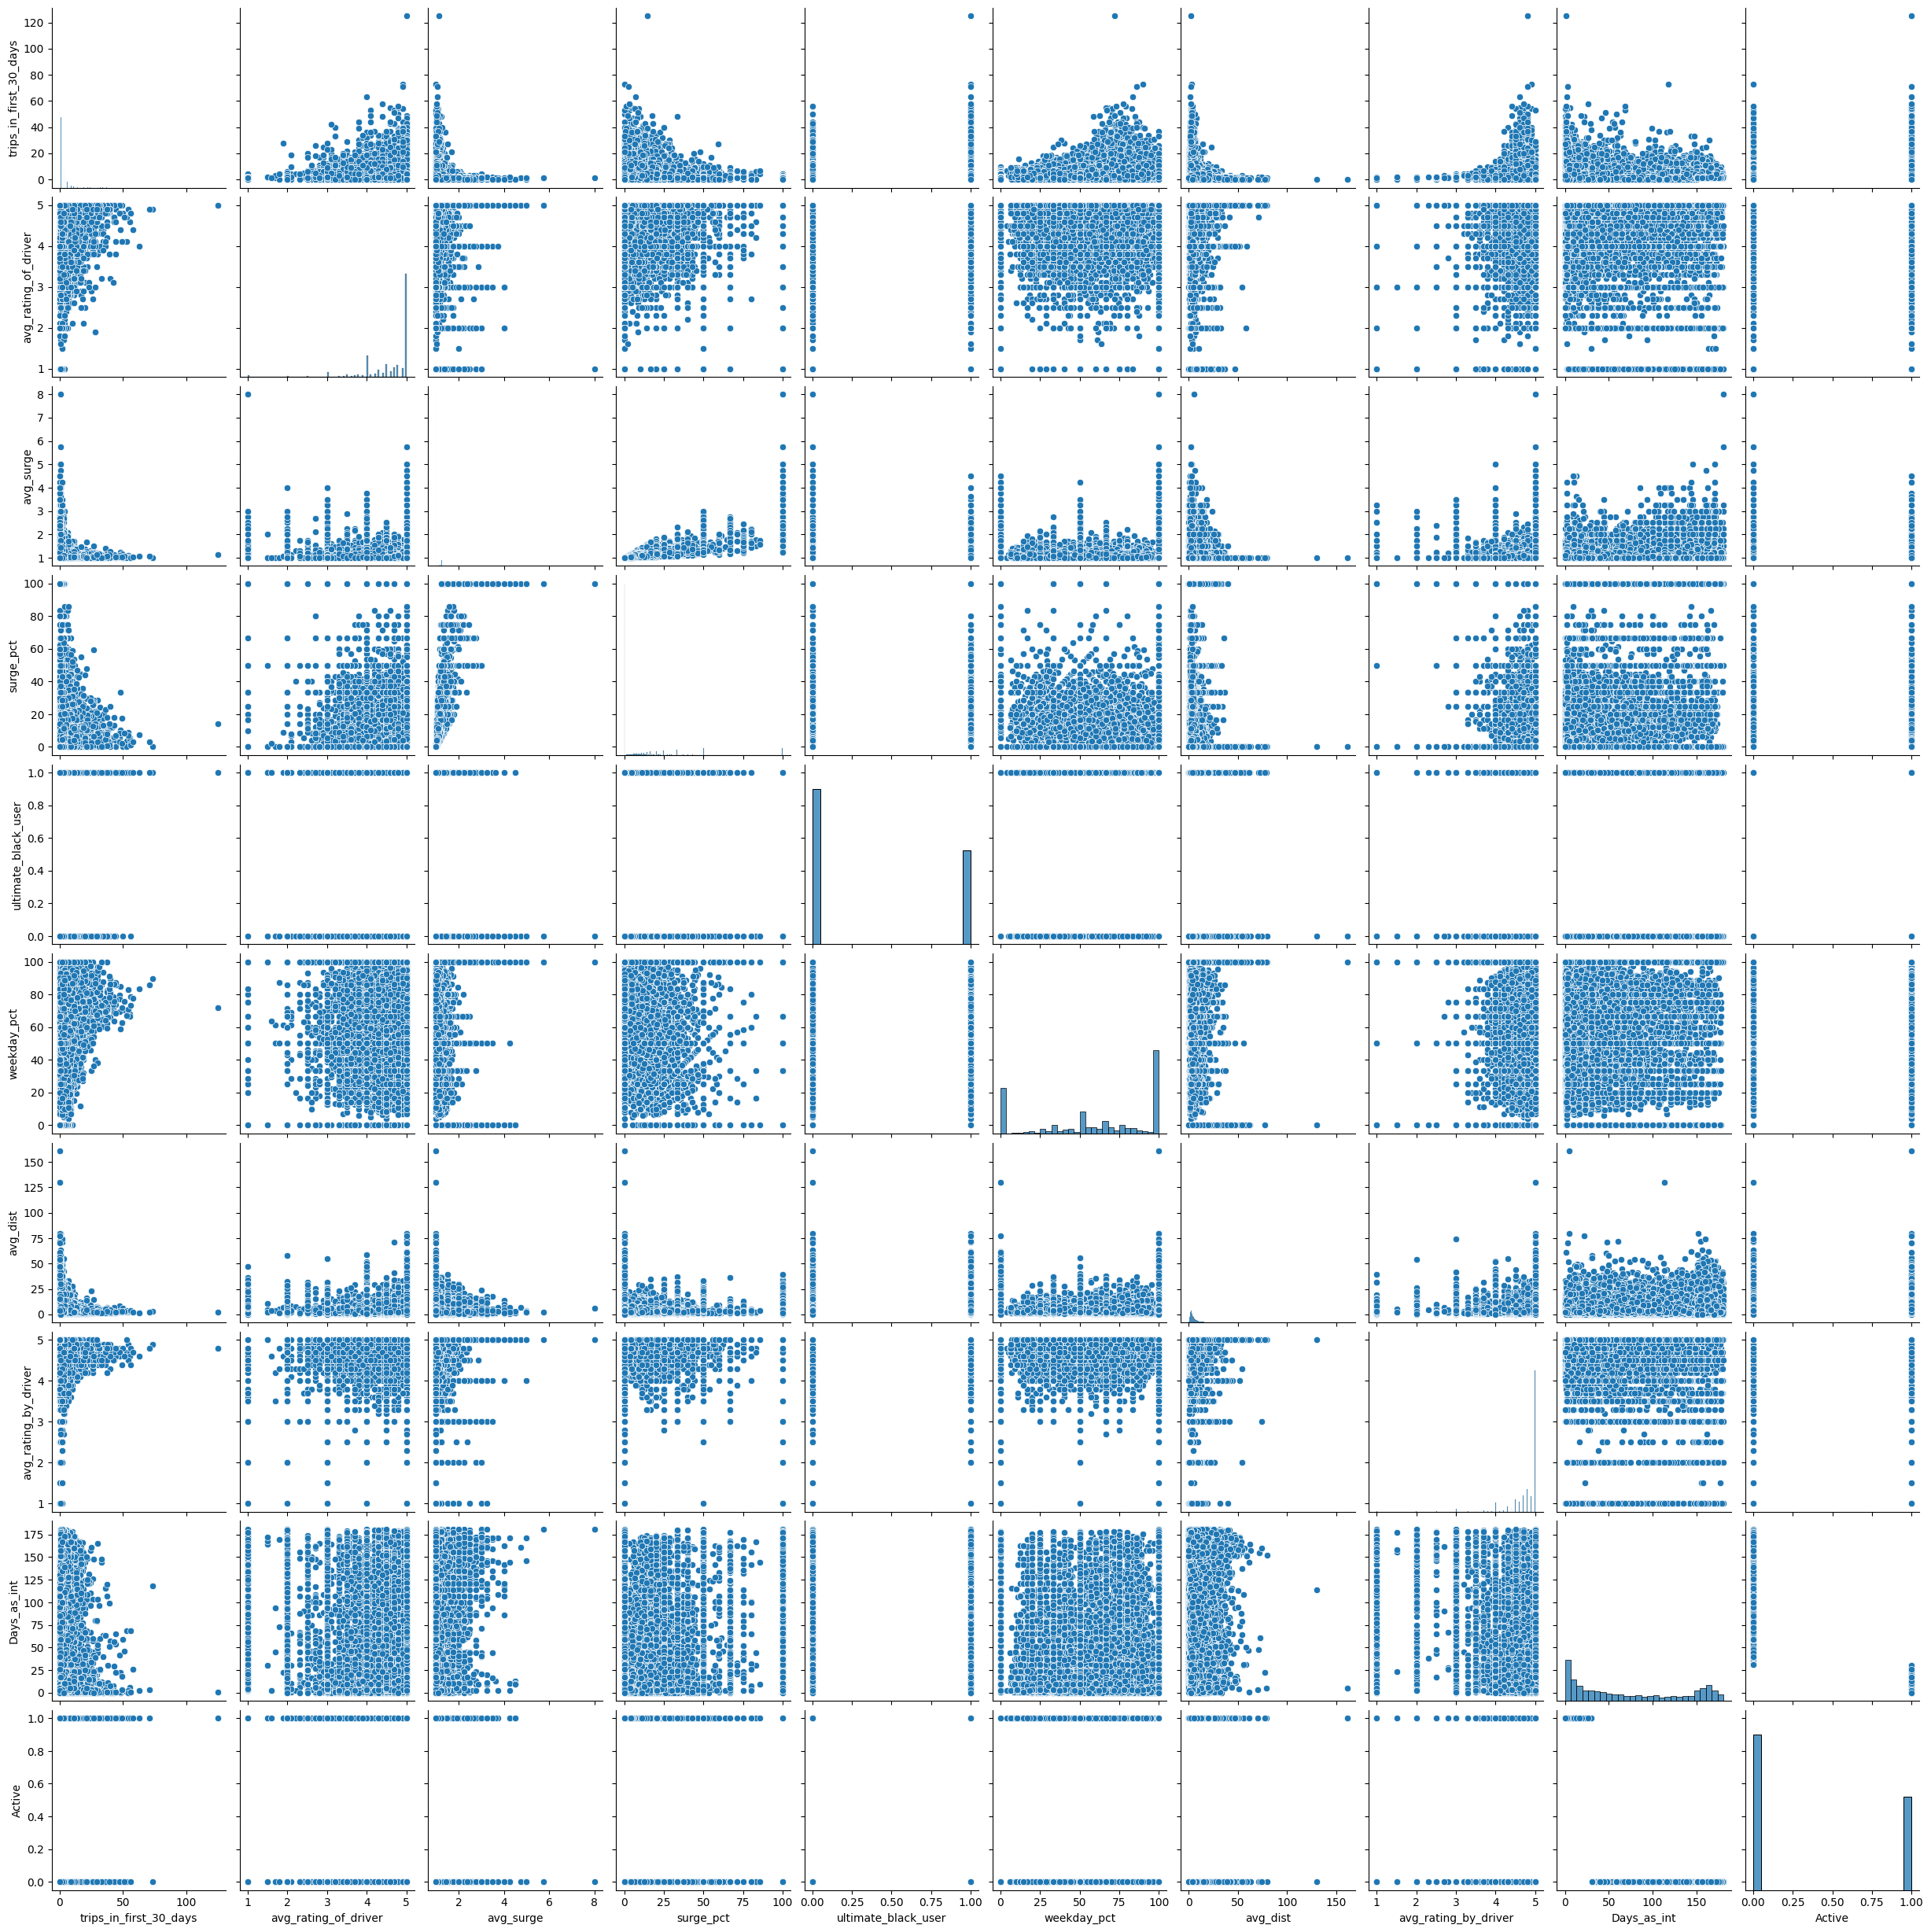

In [24]:
sns.pairplot(data=df)

Using a pairplot, we can get a quick, comprehensive glimpse of which features are correlated with each other. For example, we can see that the number of trips in the frist thirty days is negatively correlated with average distance travelled. So, the more trips in the first 30 days, the less distance travelled.
Overall, this pariplot doesn't give us the differentiation we are looking for between active users and inactive users. Let's split the two groups and look more carefully at each.

In [25]:
#splitting active drivers and inactive drivers to see the differences between the two groups.
active_drivers_df = df[df['Active']==True]
inactive_drivers_df = df[df['Active']==False]

In [26]:
active_drivers_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Days_since_last_trip,Days_as_int
count,18804.000000,17172.000000,18804.000000,18804.000000,18804.000000,18804.000000,18768.000000,18804,18804.000000
mean,3.306318,4.592930,1.073809,9.152797,61.389034,5.114788,4.762772,10 days 14:13:28.679004467,10.592693
std,4.986743,0.542386,0.163170,15.588704,29.487584,4.615175,0.328489,8 days 15:58:50.863218204,8.665866
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0 days 00:00:00,0.000000
25%,0.000000,4.300000,1.000000,0.000000,44.400000,2.560000,4.700000,3 days 00:00:00,3.000000
50%,2.000000,4.800000,1.000000,0.000000,64.300000,3.730000,4.800000,9 days 00:00:00,9.000000
75%,4.000000,5.000000,1.090000,13.300000,84.600000,5.890000,5.000000,17 days 00:00:00,17.000000
max,125.000000,5.000000,4.500000,100.000000,100.000000,160.960000,5.000000,30 days 00:00:00,30.000000


In [27]:
inactive_drivers_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Days_since_last_trip,Days_as_int
count,31196.000000,24706.000000,31196.000000,31196.000000,31196.000000,31196.000000,31031.000000,31196,31196.000000
mean,1.658482,4.607557,1.075339,8.666739,60.647032,6.207939,4.787464,110 days 01:56:08.277984356,110.080651
std,2.654222,0.664418,0.251361,22.179139,40.982688,6.238675,0.504648,48 days 08:22:34.637402508,48.349012
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,31 days 00:00:00,31.000000
25%,0.000000,4.400000,1.000000,0.000000,16.700000,2.320000,4.800000,63 days 00:00:00,63.000000
50%,1.000000,5.000000,1.000000,0.000000,69.600000,4.030000,5.000000,114 days 00:00:00,114.000000
75%,2.000000,5.000000,1.000000,0.000000,100.000000,7.800000,5.000000,157 days 00:00:00,157.000000
max,73.000000,5.000000,8.000000,100.000000,100.000000,129.890000,5.000000,181 days 00:00:00,181.000000


The first thing that sticks out here is just how similar these two groups of drivers are. Many of the features are virtually the same for active drivers and inactive drivers. The two features that seem the most different between the two groups are the number of trips in the first 30 days (the average for active drivers is almost double than for inactive drivers) and the average distance travelled (4.6 miles for active vs. 6.2 for inactive).

<Axes: xlabel='Active', ylabel='trips_in_first_30_days'>

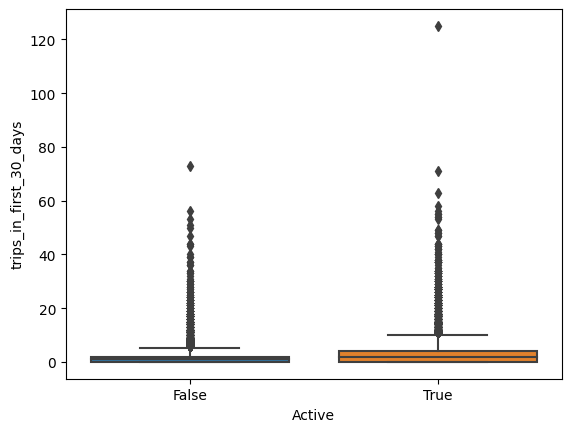

In [28]:
sns.boxplot(data=df, x = 'Active', y='trips_in_first_30_days')

<Axes: xlabel='Active', ylabel='avg_dist'>

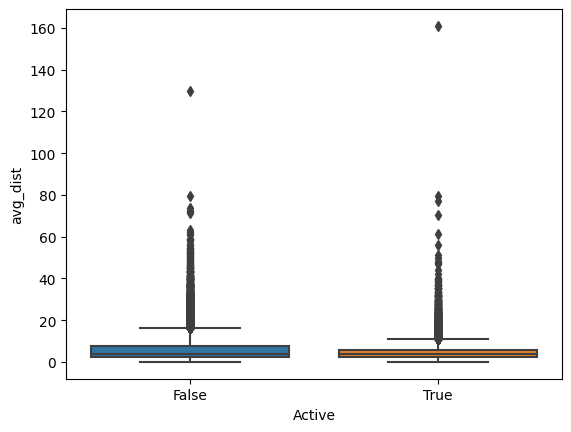

In [29]:
sns.boxplot(data=df, x = 'Active', y='avg_dist')

The two boxplots above help us visualize what we saw in the summary statistics.
The first boxplot shows us that the active drivers were taking more trips in their first 30 days.
In the second boxplot, we see the much tighter interquartile range. Active drivers tend to take shorter trips.

Each of these boxplots show us potential outliers as well. One active driver has an average distance of double the next nearest driver. Also, one active driver took many more trips than anyone else.
In this case, I will drop the driver whose average distance is 160 miles, along with the inactive driver whose average distance is over 100 miles. That is a rarity and the drivers probably only took one trip.
I will also drop the driver who took so many trips in the first month.

In [30]:
df = df[df['avg_dist']<100]

In [31]:
df = df[df['trips_in_first_30_days']<100]

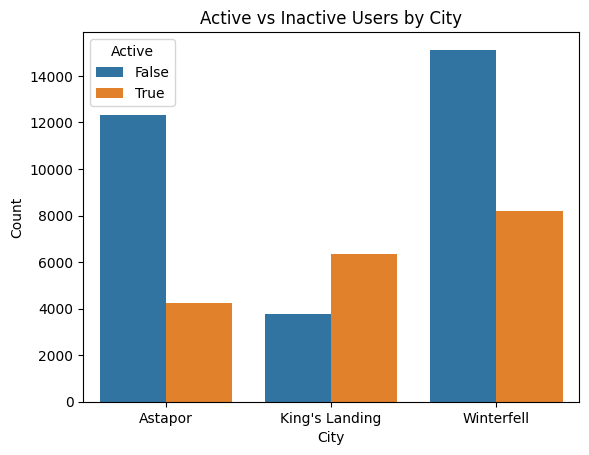

In [32]:
grouped_data = df.groupby(['city', 'Active']).size().reset_index(name='count')

sns.barplot(data=grouped_data, x='city', y='count', hue='Active')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Active vs Inactive Users by City')
plt.show()

A categorical feature that we haven't looked at yet is what city the drivers are from. Clearly, it is important. Most drivers come from Winterfell. King's Landing, however, has a much higher percentage of active drivers than either of the other two cities. This is probably the most important finding so far.
Astapor has the smallest percentage of active drivers.

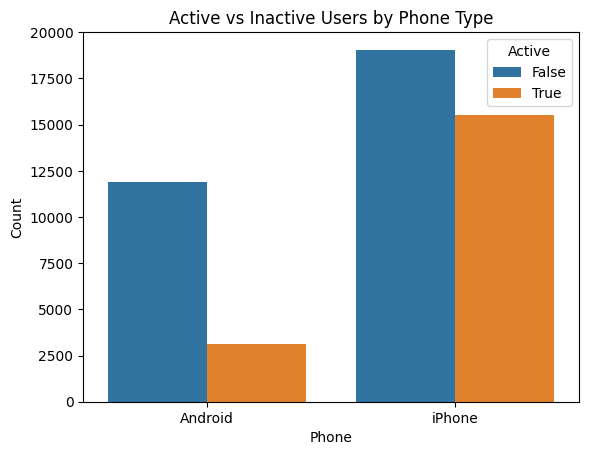

In [33]:
grouped_phone_data = df.groupby(['phone', 'Active']).size().reset_index(name='count')

sns.barplot(data=grouped_phone_data, x='phone', y='count', hue='Active')
plt.xlabel('Phone')
plt.ylabel('Count')
plt.title('Active vs Inactive Users by Phone Type')
plt.show()

Here, I checked to see if the type of phone that a person uses influences whether or not they are an active user. This graph shows us that iPhone users have a much higher likelihood of being active than Android users.

In [34]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8120
avg_surge                    0
last_trip_date               0
phone                      395
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       200
pull_date                    0
Days_since_last_trip         0
Days_as_int                  0
Active                       0
dtype: int64

Another thing we need to check before moving to modelling is missing values. The average ratings of drivers are the largest value missing. We should be able to fill this in with the mean value. We can do the same thing with the average rating by driver.
We can't just do that with the type of phone, though. We just saw that the type of phone a person uses may be an important indicator about whether or not they will be active. Since there are only 395 out of 50,000 instances, we'll drop these data points.

In [35]:
df = df[df['phone'].notnull()]

The other obvious indicator of whether a driver is active is how many days since their last trip. How do we use this or can we even use this in our model?
It doesn't make very much sense to build a model that can predict whether or not a driver will be active in their 6th month when the drivers have been driving for nearly 6 months already.
So, to build our model, we will assume that we want to predict if a driver will be active in month 6 after their first 30 days. What this means for our features is that we will need to drop the last trip date and features we have created like the days since their last trip and that feature as an integer.

Now that we have explored the data, I will explore which model to use. A few things that are important to note:
-This is a binary classification problem (Active vs. not Active in 6th month).
-Data is tabular
-Data contains categorical variables, which also seem to be very important

For this exercise, I will use an xgboost classifier since this typically performs as well or better than other modles on tabular data. Xgboost uses boosted trees to make predictions.

In [36]:
final_df = df.drop(['pull_date', 'Days_since_last_trip', 'Days_as_int'],axis=1)

In [37]:
final_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [38]:
one_hot_encoded_df = pd.get_dummies(final_df, columns = ['city', 'phone','ultimate_black_user'],drop_first=True)
one_hot_encoded_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Active,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,True,1,0,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,False,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,False,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,True,1,0,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,False,0,1,0,0


In [39]:
X=one_hot_encoded_df.drop(['Active','signup_date','last_trip_date'],axis=1)
y=final_df['Active']

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb

In [41]:
num_pipe = Pipeline(steps=[("impute", SimpleImputer(strategy="mean")), ("scale", StandardScaler())])

In [42]:
num_cols = X.select_dtypes(include="number").columns

In [43]:
num_cols

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'city_King's Landing', 'city_Winterfell', 'phone_iPhone',
       'ultimate_black_user_True'],
      dtype='object')

In [44]:
from sklearn.compose import ColumnTransformer

In [45]:
full_processor = ColumnTransformer(
    transformers=[
        ("numeric", num_pipe, num_cols)])

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [47]:
X_tr_processed=full_processor.fit_transform(X_train)
X_te_processed=full_processor.fit_transform(X_test)

In [48]:
print(X_tr_processed.shape, X_te_processed.shape, y_train.shape, y_test.shape)

(37201, 11) (12401, 11) (37201,) (12401,)


In [137]:
xgb = xgb.XGBClassifier()

In [49]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    "objective":['reg:squarederror']
}

In [53]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=4, n_jobs=-1)

In [52]:
grid_search.fit(X_tr_processed,y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 500, 1000],
                         'objective': ['reg:squarederror']})

In [53]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}
0.7898442819768483


In [50]:
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}

In [51]:
xgb_cl = xgb.XGBClassifier(**best_params)
xgb_cl.fit(X_tr_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='reg:squarederror', predictor=None, ...)

In [52]:
y_pred = xgb_cl.predict(X_te_processed)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7830013708571889

In [54]:
class_names=['Not Active', 'Active'] # name  of classes

Confusion matrix, without normalization
[[6490 1290]
 [1401 3220]]
Normalized confusion matrix
[[0.83 0.17]
 [0.3  0.7 ]]


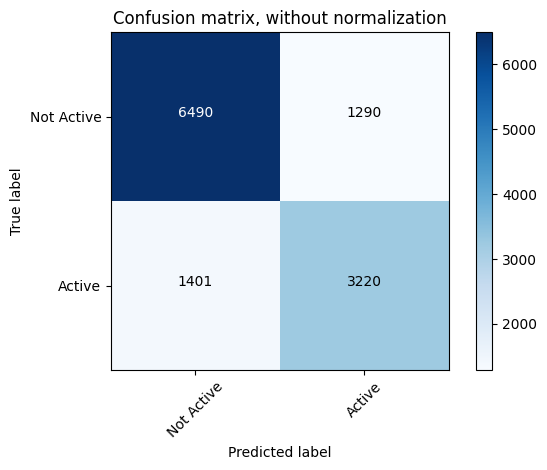

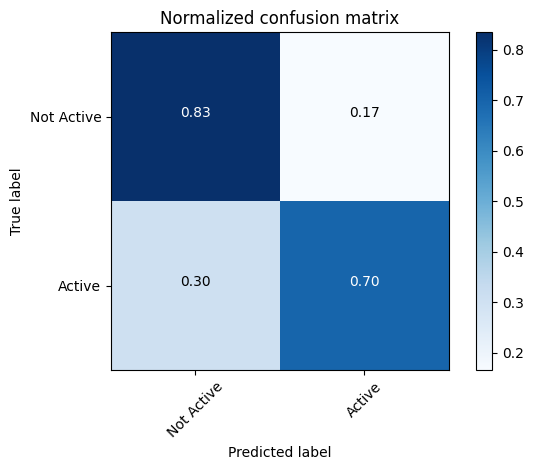

In [55]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

we can see here that using xgboost, the model had about 78% accuracy. Looking at the confusion matrix, we can see that our mistakes are spread out between both active and inactive users.

Setting a baseline for this problem is a challenge, but we could just say that 37% of our users are active and 63% are inactive. Thus, assigning everyone to "inactive," we could get an accuracy of 63%. This model significantly improves on that naive assumption.

In [56]:
importances = xgb_cl.feature_importances_

In [57]:
print(importances)

[0.02 0.01 0.01 0.1  0.07 0.01 0.17 0.22 0.04 0.21 0.15]


In [59]:
indices = np.argsort(importances)[::-1]

print('Features:')
for i in indices:
    print(X_test.columns[i], importances[i])

Features:
city_King's Landing 0.21737868
phone_iPhone 0.20958446
avg_rating_by_driver 0.16804598
ultimate_black_user_True 0.14989215
surge_pct 0.101100035
weekday_pct 0.06674495
city_Winterfell 0.039196923
trips_in_first_30_days 0.018987663
avg_rating_of_driver 0.013314862
avg_dist 0.0085425265
avg_surge 0.007211792


When we look at the importances of the boosted model, we can see that the city and the type of phone the user used were the most important features for the model.